## Protein Stability Classification

In [2]:
from pathlib import Path

data_path = Path("data") 

!ls $data_path

embeddings_fireprot.pkl  fireprotdb_results.csv  stability_fireprot.h5


### Get and Categorize Dataset 

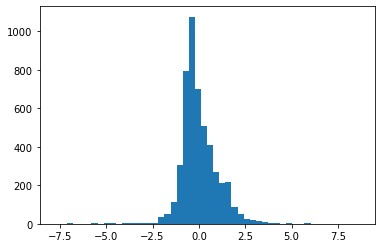

In [3]:
from sklearn.preprocessing import Binarizer
import matplotlib.pyplot as plt
import numpy as np

from protera_stability.data import ProteinStabilityDataset


train_set = ProteinStabilityDataset(proteins_path=data_path / "stability_fireprot.h5")

plt.hist(train_set.y, bins=50)
plt.show()

original_y = train_set.y_scaler.inverse_transform(train_set.y)
categorized_y = Binarizer(threshold=-1).fit_transform(original_y.reshape(-1, 1)).reshape(original_y.shape) # 0  => Stabilizing (-1 <), 1 Destabilizing or neutral (-1 >)
categorized_y = np.where(categorized_y == 0, 1, 0) # 1  => Stabilizing (-1 <), 0 Destabilizing or neutral (-1 >)

train_set.y = categorized_y

## Apply Dim Reduction

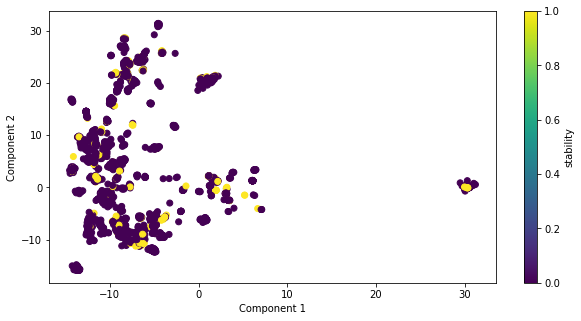

In [13]:
from protera_stability.utils.decomposition import dim_reduction

X = dim_reduction(train_set.X, train_set.y, n_components=32, plot_viz=True, prefix="stability")
y = train_set.y

## Simple Classifier

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

clf.score(X_test, y_test) # mean accuracy

0.9418416801292407